In [55]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
from dataloaders import lvs_dataset

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

def plot_iou(stats_dict, sequence, show_updates=False):
    class_names = lvs_dataset.sequence_to_class_groups_stable[sequence]
    num_classes = len(class_names) + 1
    
    num_updates = np.zeros(len(stats_dict), np.int32)
    ious = np.zeros([len(stats_dict), num_classes], np.float32)
    frames = np.zeros(len(stats_dict), np.int32)
    for i, frame in enumerate(sorted(stats_dict.keys())):
        frame_stats = stats_dict[frame]
        for cls in range(num_classes):
            ious[i, cls] = frame_stats['iou'][cls]
            frames[i] = frame
            num_updates[i] = frame_stats['num_updates']
    
    plt.figure()
    for cls in range(1, num_classes):
        x = frames
        y = smooth(ious[:, cls], 64)
        plt.plot(x, y, label=class_names[cls - 1])
    plt.legend()
    if show_updates:
        plt.figure()
        plt.plot(frames, smooth(num_updates, 64), label='updates')
    plt.legend()
    
def extract_frame(video_path, frame_id):
    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame

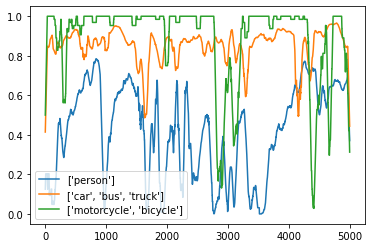

In [26]:
stats_dict = np.load('results/driving_ckpts/online_distillation_dataset.sequence=driving1,online_train.bg_weight=1,online_train.checkpoint_good_model=true,online_train.fg_weight=10,online_train.max_frames=5000,online_train.max_updates=16/stats.npy', allow_pickle=True)[0]
plot_iou(stats_dict, 'driving1')

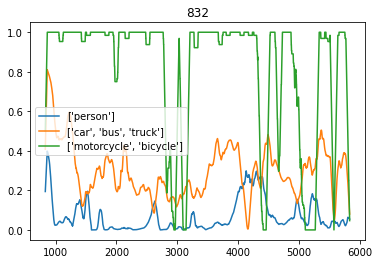

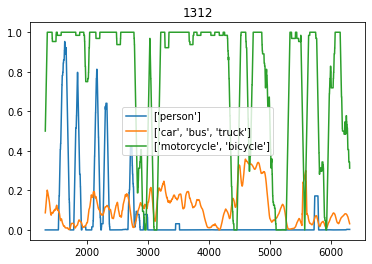

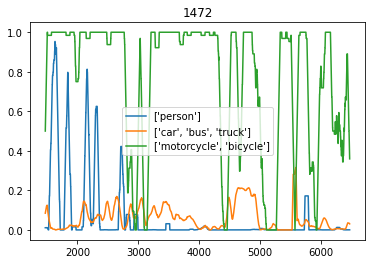

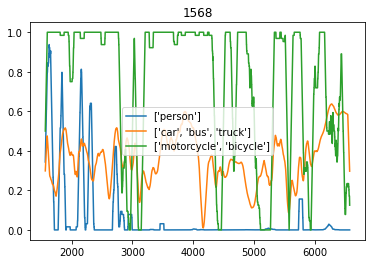

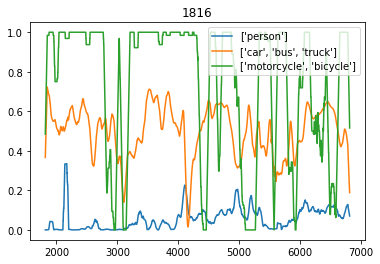

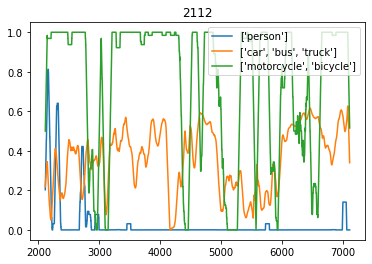

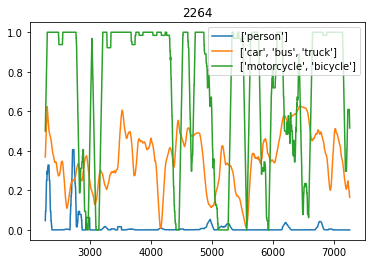

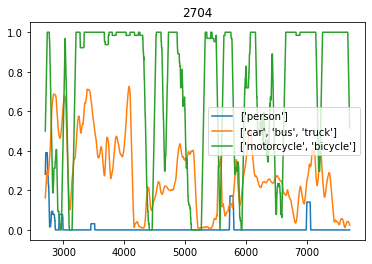

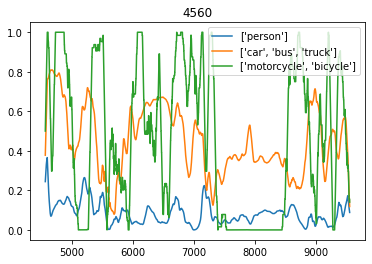

In [27]:
for i in [832, 1312, 1472, 1568, 1816, 2112, 2264, 2704, 4560]:
    stats_dict = np.load(f'results/driving_ckpts_eval_{i}/online_distillation_dataset.sequence=driving1,dataset.start_frame={i},model.ignored_vars=[],online_train.max_frames=5000,online_train.max_updates=16,online_train.online_train=false/stats.npy', allow_pickle=True)[0]
    plot_iou(stats_dict, 'driving1')
    plt.title(f'{i}')

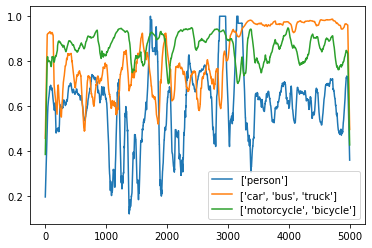

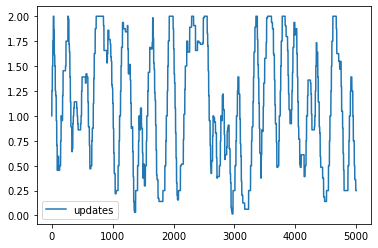

In [46]:
stats_dict = np.load('results/samui_walking_street1_ckpts/online_distillation_dataset.sequence=samui_walking_street1,online_train.bg_weight=1,online_train.checkpoint_good_model=true,online_train.fg_weight=10,online_train.max_frames=5000,online_train.max_updates=16/stats.npy', allow_pickle=True)[0]
plot_iou(stats_dict, 'samui_walking_street1', show_updates=True)

['./results/samui_walking_street1_eval_2160',
 './results/samui_walking_street1_eval_1616',
 './results/samui_walking_street1_eval_880',
 './results/samui_walking_street1_eval_2264',
 './results/samui_walking_street1_eval_1488',
 './results/samui_walking_street1_eval_1328',
 './results/samui_walking_street1_eval_1792',
 './results/samui_walking_street1_eval_2688',
 './results/samui_walking_street1_eval_4480']

/home/cfan/miniconda3/envs/jitnet/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/cfan/miniconda3/envs/jitnet/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/home/cfan/miniconda3/envs/jitnet/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too 

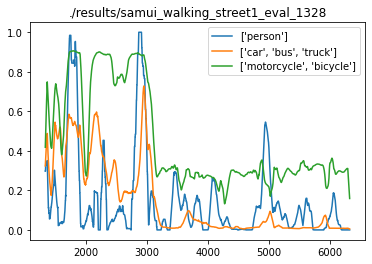

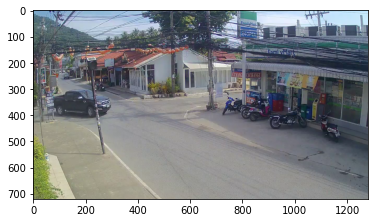

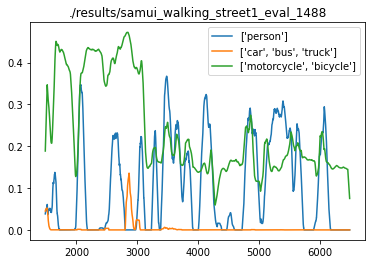

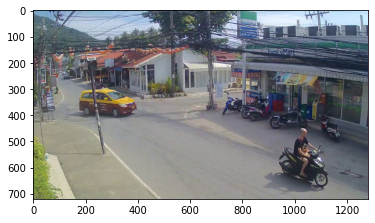

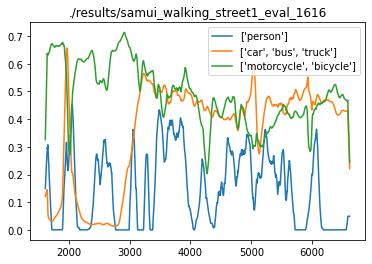

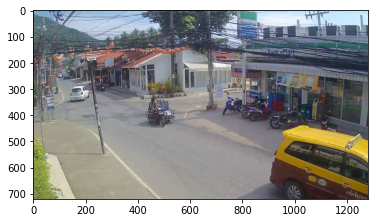

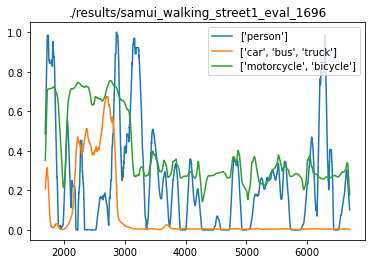

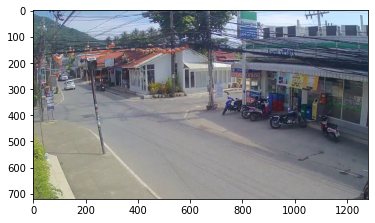

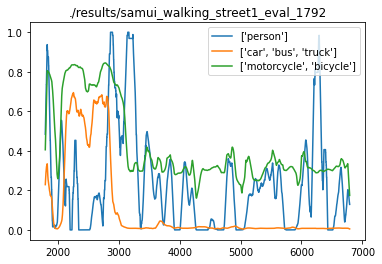

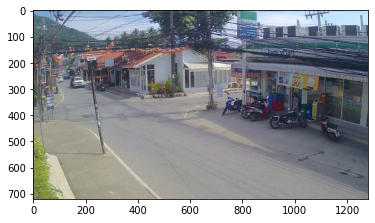

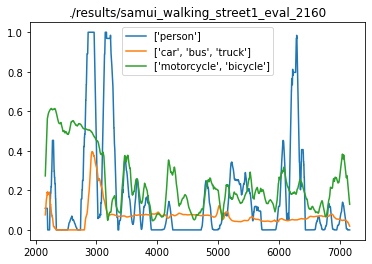

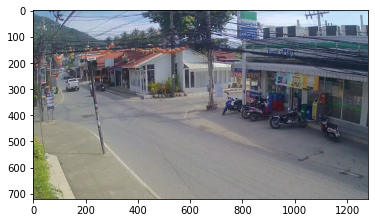

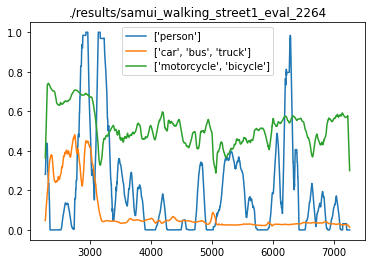

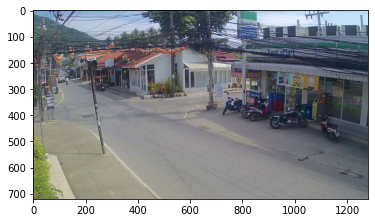

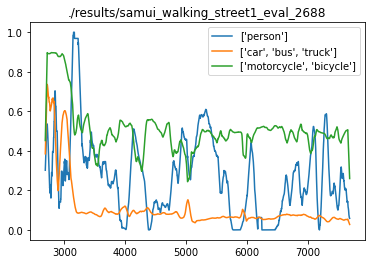

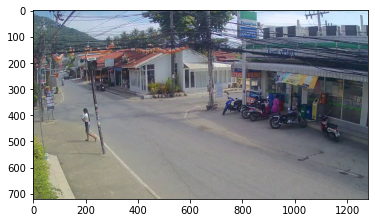

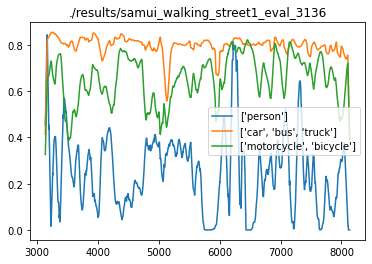

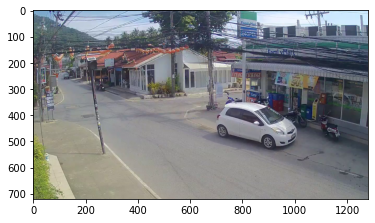

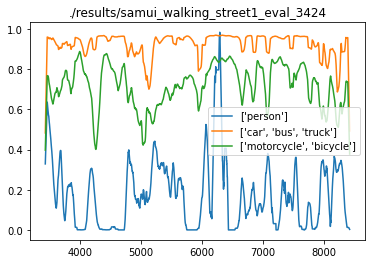

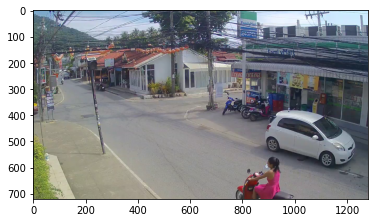

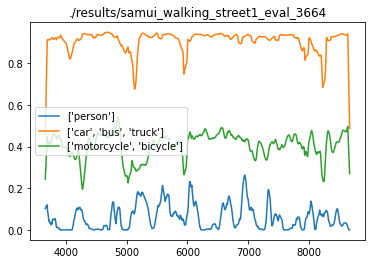

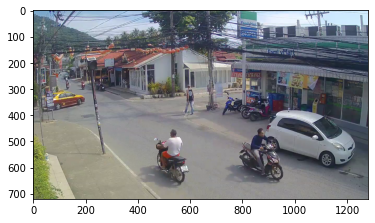

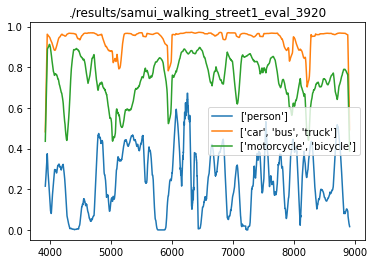

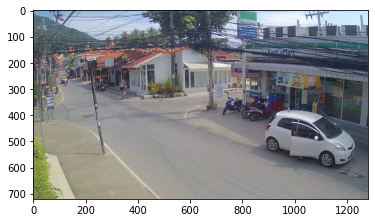

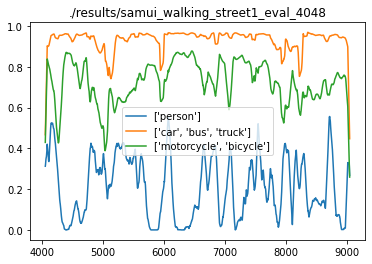

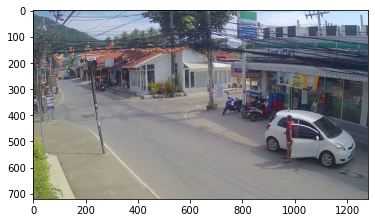

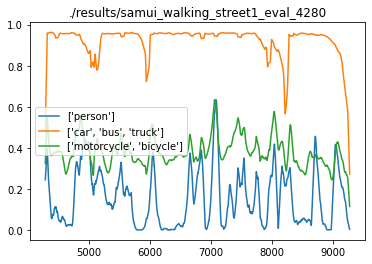

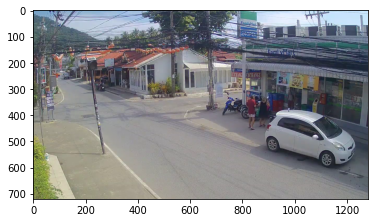

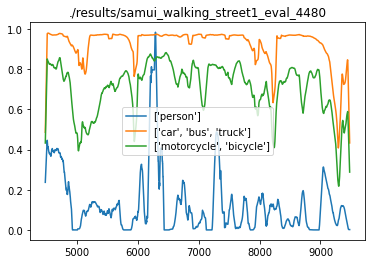

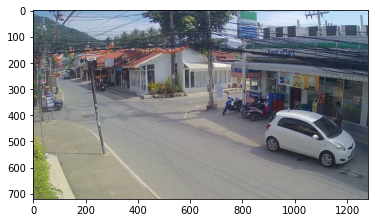

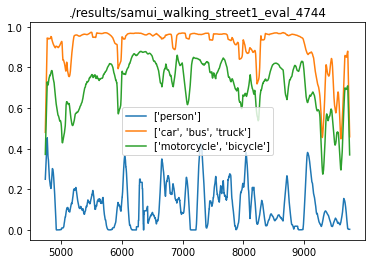

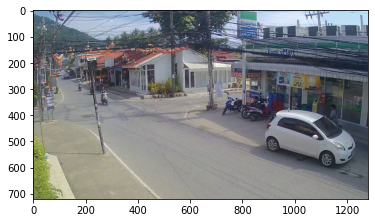

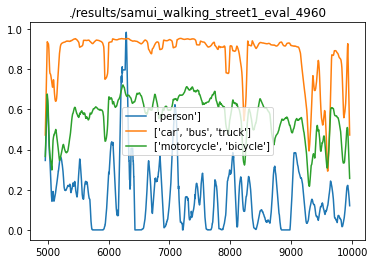

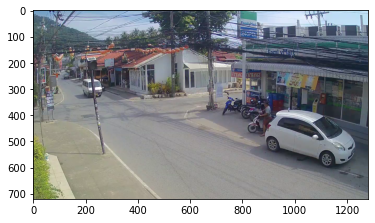

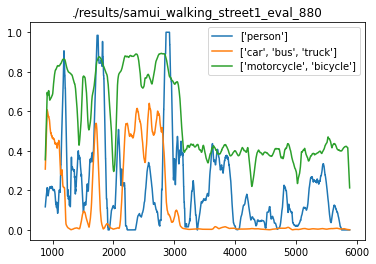

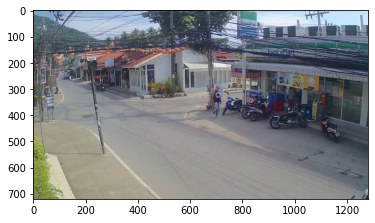

In [69]:
for i in sorted(glob.glob('./results/samui_walking_street1_eval_*')):
    start_frame = i.split('_')[-1]
    stats_dict = np.load(f'{i}/online_distillation_dataset.sequence=samui_walking_street1,dataset.start_frame={start_frame},model.ignored_vars=[],online_train.max_frames=5000,online_train.max_updates=16,online_train.online_train=false/stats.npy', allow_pickle=True)[0]
    plot_iou(stats_dict, 'samui_walking_street1')
    plt.title(f'{i}')
    frame = extract_frame('/home/cfan/lvsdataset/samui_walking_street1/samui_walking_street1001.mp4', int(start_frame))
    plt.figure()
    plt.imshow(frame)